# 1. 데이터 및 사전 준비 단계

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #jupyter notebook에서 그래프 결과물을 바로 볼 수 있다. 
import matplotlib
import itertools

from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/Users/jeonghyeonjeong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.logging.set_verbosity(tf.logging.INFO) #Sets the threshold for what messages will be logged.

sess = tf.InteractiveSession()

In [3]:
train = pd.read_csv("2016.csv") #train set : 2016년 세계 행복지수 data
print("shape of the train data with all features : ", train.shape)
train = train.select_dtypes(exclude = ['object']) #그 중에서 수치데이터가 아닌 항목은 제외시킵니다. <예) 국가이름>
print(" ")
print("shape of the train data with numerical features : ", train.shape) #shape를 확인합니다. 


test = pd.read_csv("2017.csv") #test set : 2017년 세계 행복지수 data
test = test.select_dtypes(exclude = ['object']) #그 중에서 수치데이터가 아닌 항목은 제외시킵니다. <예) 국가이름>
print(" ")
print("shape of the test data with numerical features : ", test.shape) #shape를 확인를 확인합니다. 

print(" ")
print("List of features contained our dataset : ", list(train.columns))

shape of the train data with all features :  (155, 11)
 
shape of the train data with numerical features :  (155, 11)
 
shape of the test data with numerical features :  (155, 11)
 
List of features contained our dataset :  ['Happiness.Rank', 'HappinessScore', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']


In [4]:
train.head(10) #위의 10개만 출력하여 앞에서의 명령이 잘 실행되었는지 확인합니다. 

,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.36171,0.44453,2.73939
1,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.28083,0.41203,2.69463
2,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.47678,0.14975,2.83137
3,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.37895,0.35776,2.66465
4,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.25492,0.41004,2.82596
5,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.44834,0.31329,2.70485
6,7,7.339,7.284,7.394,1.46468,1.02912,0.81231,0.55211,0.47416,0.29927,2.70749
7,8,7.334,7.264,7.404,1.36066,1.17278,0.83096,0.58147,0.49401,0.41904,2.47553
8,9,7.313,7.241,7.385,1.44443,1.10476,0.85120,0.56837,0.47407,0.32331,2.54650
9,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.38254,0.40867,2.54734


# 2. preprocessing 단계 : MinMaxScaler기능을 이용하여 normalization합니다. 

In [5]:
import warnings
warnings.filterwarnings('ignore') #경고메세지는 무시하고 숨깁니다. 

col_train = list(train.columns)
col_train_bis = list(train.columns)  

col_train_bis.remove('HappinessScore') #HappinessScore을 output으로 예측하는 것이 우리의 목표이기 때문에 data에서 HappinessScore부분을 제거해 줍니다.
col_train_bis.remove('Happiness.Rank') #Happines.Rank는 HappinessScore를 바탕으로 순위를 매겨놓은 것이기 때문에, featrue에서 제외시켜 줍니다.


mat_train = np.matrix(train)
print('mat train : ', mat_train.shape)
mat_test  = np.matrix(test)
print('mat tests : ', mat_test.shape)

raw_X_train = np.matrix(train.drop('HappinessScore', axis = 1).drop('Happiness.Rank', axis = 1))#HappinessScore행을 빼서, feature들만 있는 matrix를 만듭니다. (이것이 X_train이 됩니다. )
print('raw_x_train : ', raw_X_train.shape)
raw_y_train = np.array(train.HappinessScore).reshape((155,1))#HappinessScore행만 있는 matrix를 만듭니다. (이것이 y_train이 됩니다. )
print('raw_y_train : ', raw_y_train.shape)
raw_X_test = np.matrix(test.drop('HappinessScore', axis = 1).drop('Happiness.Rank', axis = 1))#HappinessScore행을 빼서, feature들만 있는 matrix를 만듭니다. (이것이 X_test가 됩니다. )
print('raw_x_test : ', raw_X_test.shape)
raw_y_test = np.array(test.HappinessScore).reshape((155,1))#HappinessScore행만 있는 matrix를 만듭니다. (이것이 y_test이 됩니다. )
print('raw_y_test : ', raw_y_test.shape)

#그리고 다시한번 print기능을 이용하여 matrix의 shape를 확인하여서 연산에 이상이 없을지 확인합니다. 

mat train :  (155, 11)
mat tests :  (155, 11)
raw_x_train :  (155, 9)
raw_y_train :  (155, 1)
raw_x_test :  (155, 9)
raw_y_test :  (155, 1)


In [6]:
MMS_X_train = MinMaxScaler() # 그 후 데이터를 MinMaxScaler기능을 이용하여 normalize하여 들쑥날쑥한 데이터를 처리해 줍니다. 
MMS_X_train.fit(raw_X_train)

MMS_y_train = MinMaxScaler()
MMS_y_train.fit(raw_y_train)

MMS_X_test = MinMaxScaler()
MMS_X_test.fit(raw_X_test)

MMS_y_test = MinMaxScaler()
MMS_y_test.fit(raw_y_test)

X_train = pd.DataFrame(MMS_X_train.transform(raw_X_train), columns = col_train_bis)
y_train = pd.DataFrame(MMS_y_train.transform(raw_y_train), columns = ['HappinessScore'])
X_test = pd.DataFrame(MMS_X_test.transform(raw_X_test), columns = col_train_bis)
y_test = pd.DataFrame(MMS_y_test.transform(raw_y_test), columns = ['HappinessScore'])

X_train.head() #normalize가 잘 되었는지 데이터를 일부 출력하여 확인합니다. 

,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,1.000000,0.981904,0.790333,0.983503,0.834451,0.952225,0.441266,0.879892,0.623977
1,0.992502,0.981434,0.837228,0.967868,0.905811,0.962349,0.342597,0.815562,0.608653
2,0.970244,1.000000,0.782044,1.000000,0.910325,0.930581,0.581645,0.296411,0.655467
3,0.990862,0.977908,0.864697,0.952369,0.835238,0.979638,0.462298,0.708141,0.598389
4,0.974461,0.954407,0.770708,0.958910,0.851108,0.938470,0.310988,0.811623,0.653615


In [7]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "HappinessScore"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]
#데이터 타입을 지정하기위해 colunm을 정의하는데, 모든 열이 실수이므로 
#feature_cols = [tf.contrib.layers.real_valued_column을 이용합니다. 

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.HappinessScore

# Train and Test 
#x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
#y_train = pd.DataFrame(y_train, columns = [LABEL])

training_set = pd.DataFrame(X_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
#training_sub = training_set[col_train]

,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,HappinessScore
0,1.000000,0.981904,0.790333,0.983503,0.834451,0.952225,0.441266,0.879892,0.623977,1.000000
1,0.992502,0.981434,0.837228,0.967868,0.905811,0.962349,0.342597,0.815562,0.608653,0.995974
2,0.970244,1.000000,0.782044,1.000000,0.910325,0.930581,0.581645,0.296411,0.655467,0.994080
3,0.990862,0.977908,0.864697,0.952369,0.835238,0.979638,0.462298,0.708141,0.598389,0.993370
4,0.974461,0.954407,0.770708,0.958910,0.851108,0.938470,0.310988,0.811623,0.653615,0.973242


In [8]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(X_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,HappinessScore
0,0.994201,1.000000,0.864065,0.952160,0.839045,0.965323,0.431957,0.680505,0.693215,1.000000
1,0.991528,0.996514,0.792394,0.963086,0.834726,0.951019,0.423924,0.863156,0.706605,0.996903
2,1.000000,0.981126,0.791458,1.000000,0.877892,0.952775,0.567420,0.330657,0.709893,0.993187
3,0.987333,0.989245,0.836545,0.941845,0.903779,0.942001,0.346686,0.790440,0.693102,0.991123
4,0.980138,0.986065,0.771648,0.956334,0.852200,0.938780,0.292913,0.824047,0.749120,0.985962


# 3. 딥 신경망 모델 구성단계 : tf.contrib.learn을 이용하여 Deep Neural Network Regressor을 만듭니다. 

In [9]:
#reset the index of training
training_set.reset_index(drop = True, inplace =True)
def input_fn(data_set, pred = False):
    
    if pred == False:
        
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
        
    return feature_cols


Model 1 : DNN Regressor - 첫번째 모델은 200, 100, 50, 25, 12단위에 대해 5개의 숨겨진 layer가 있으며 Relu함수를 이용합니다.

In [10]:
# Learn from training set
tf.logging.set_verbosity(tf.logging.ERROR)
DNNregressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])
#DNN Regressor with the training set 
DNNregressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x115bfe080>, 'hidden_units': [200, 100, 50, 25, 12], 'feature_columns': (_RealValuedColumn(column_name='Whisker.high', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Whisker.low', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Economy..GDP.per.Capita.', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Family', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Health..Life.Expectancy.', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Freedom', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Generosity', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _

In [11]:
#evaluation the test set by train set
ev = DNNregressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=2000) 

#loss로 display the score on the test set
loss_score1 = ev["loss"]
print("Final Loss on the testing set: {0:f}".format(loss_score1)) #ReLu를 이용한 첫번째 모델에서의 loss값 입니다. 

Final Loss on the testing set: 0.000098


In [12]:
# predict testing set, calculate mse
preds = DNNregressor.predict(input_fn=lambda: input_fn(testing_set))

y_test_pred = []

for i, pr in enumerate(preds):                   # y_test_pred에 predict값을 list 형태로 넣어줍니다.
    y_test_pred.append(pr)
    
#print(y_test_pred)
a = raw_y_test_pred = MMS_y_test.inverse_transform(np.array(y_test_pred).reshape(-1,1))

b = y_test_real = raw_y_test.reshape(-1,1)

#print(np.concatenate((np.array(a).reshape(-1,1), b), axis=1))

mse = ((a-b)**2).mean(axis=0)
print("Final Mean Square Error on the testing set : ", mse) #ReLu를 이용한 첫번째 모델에서 testing set의 mean square error값 입니다. 

Final Mean Square Error on the testing set :  [0.00229289]


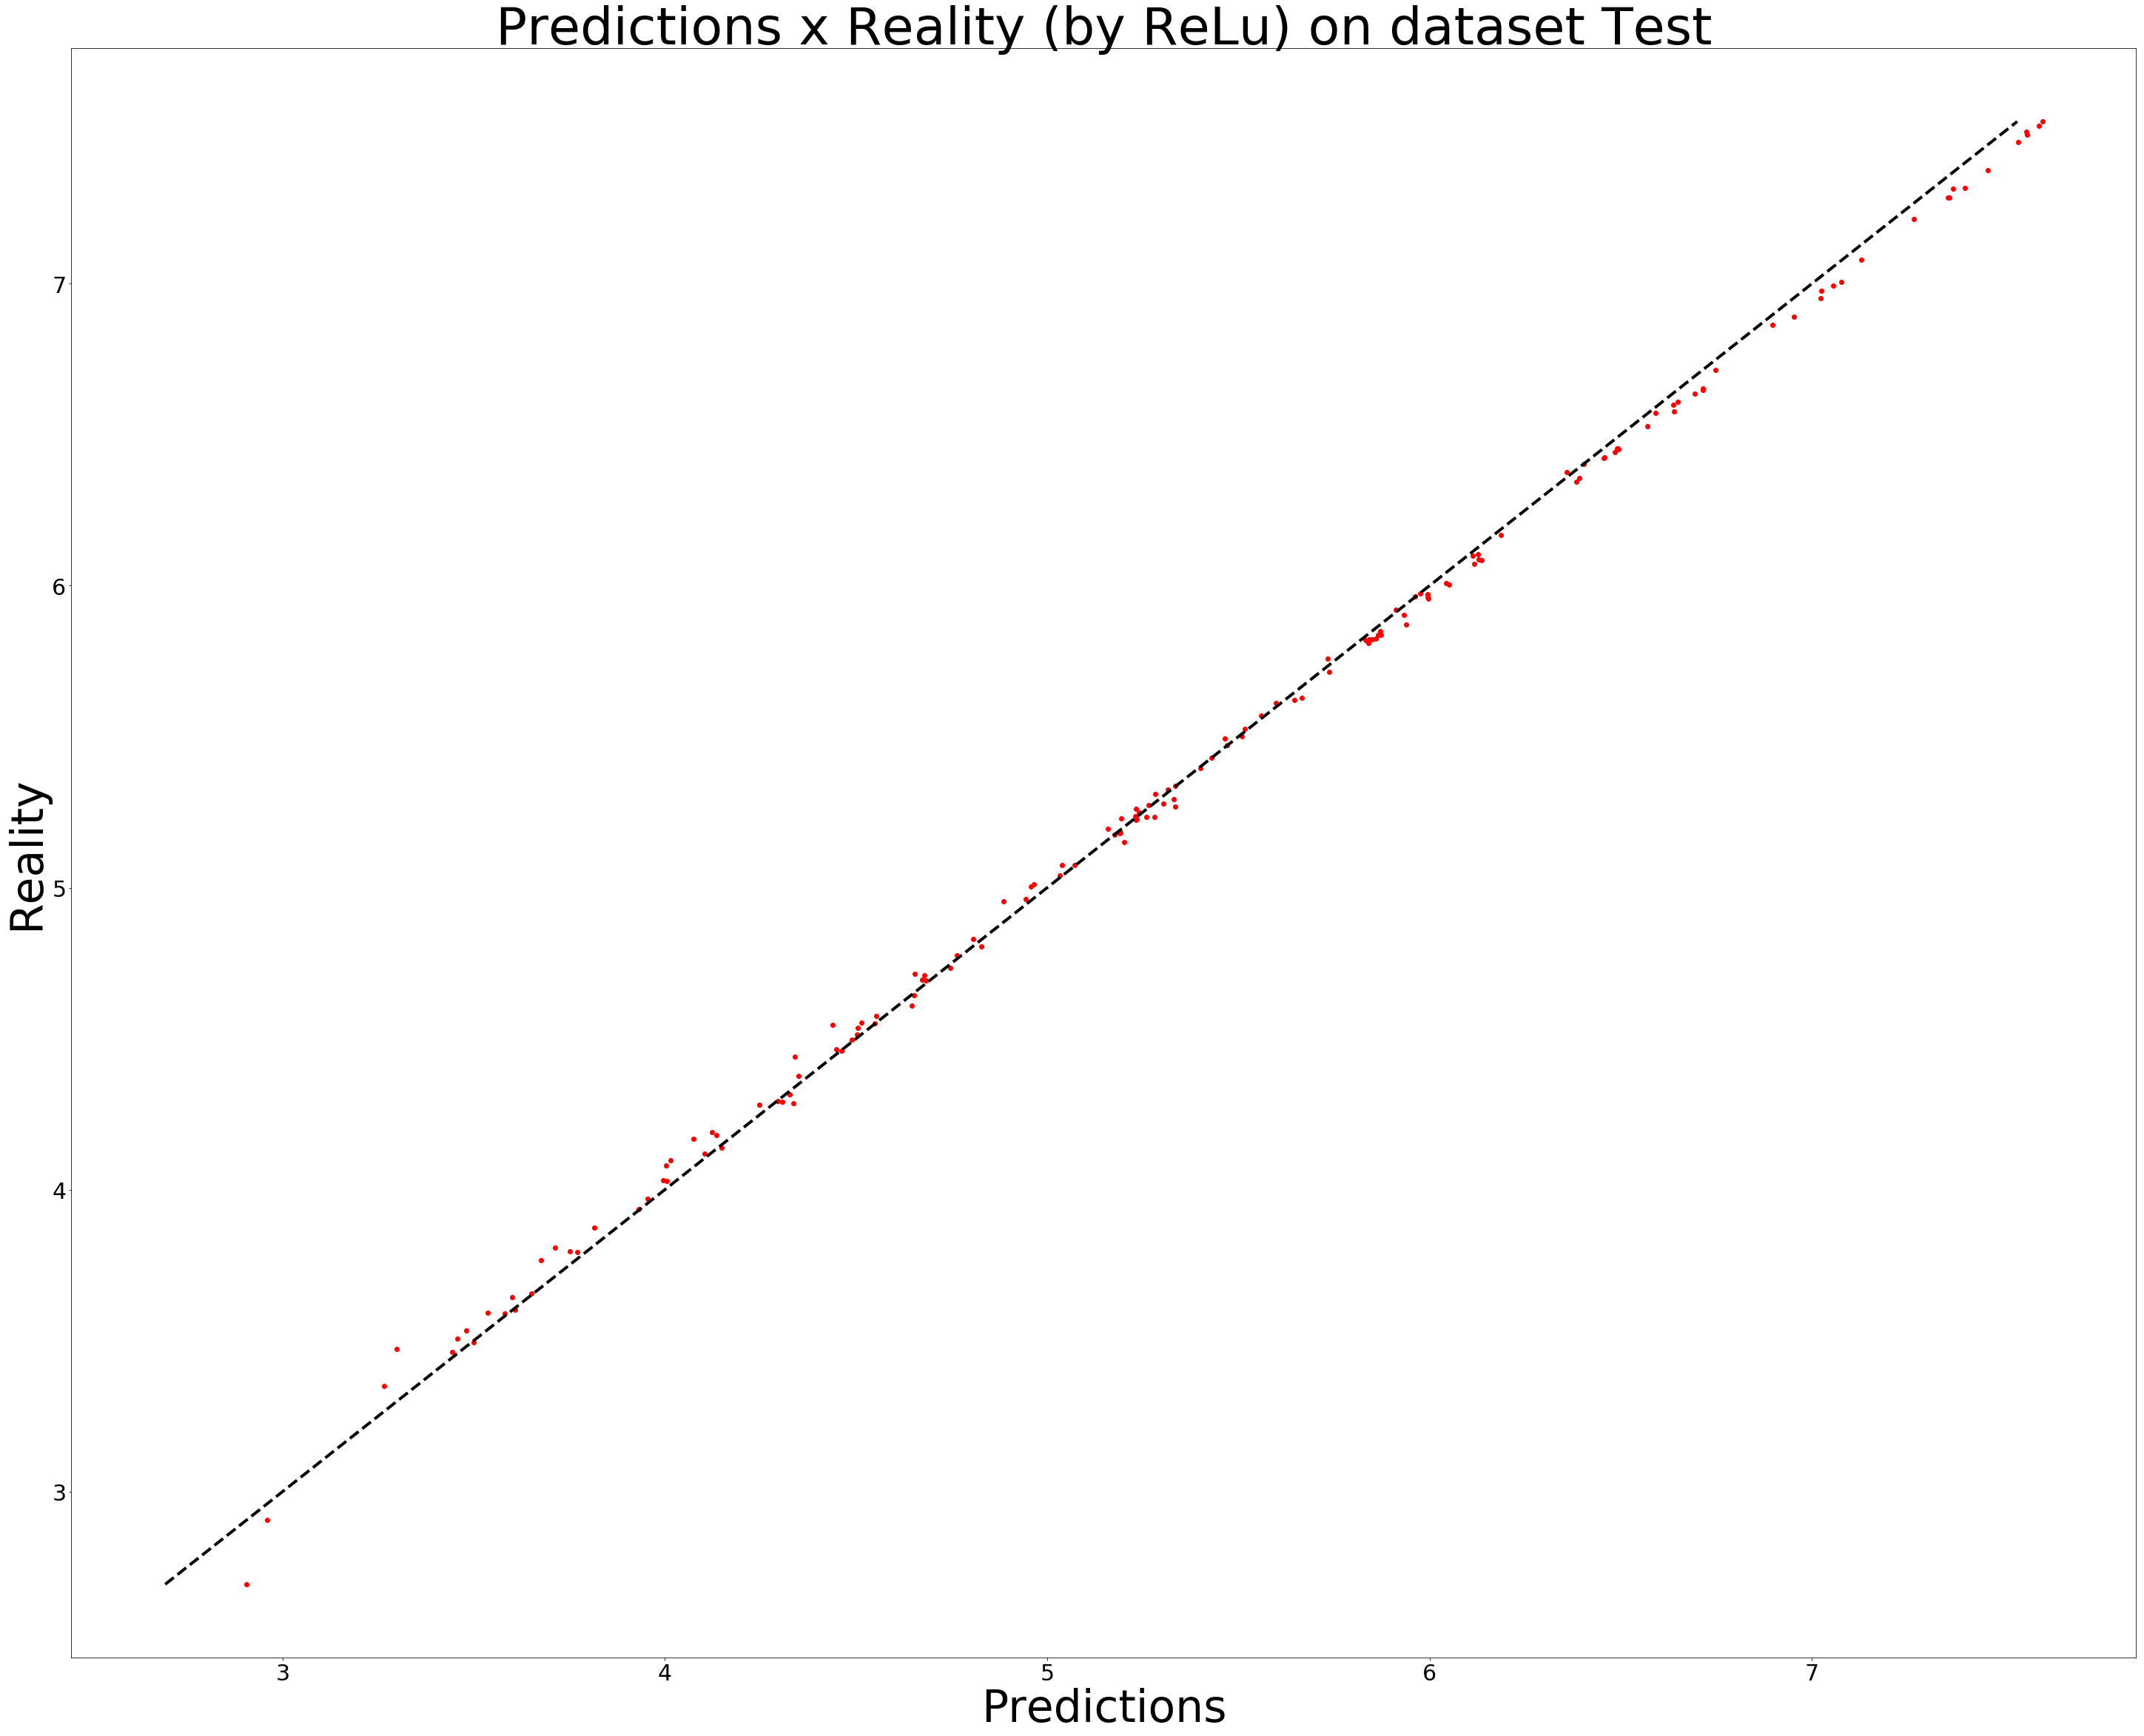

In [13]:
#Visualization

predictions = pd.DataFrame(np.array(raw_y_test_pred).reshape(-1,1),columns = ['Prediction'])
reality = pd.DataFrame(np.array(y_test_real).reshape(-1,1), columns = ['HappinessScore'])

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 60)
plt.ylabel('Reality', fontsize = 60)
plt.title('Predictions x Reality (by ReLu) on dataset Test', fontsize = 70)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show() #예상한 것을 matplotlib를 이용하여 그래프로 나타낸다. 

Model 2 : 두 번째 모델은 200, 100, 50, 25, 12단위에 대해 5개의 숨겨진 layer가 있으며  Leaky Relu함수를 이용합니다. 

In [14]:
def leaky_relu(x):
    return tf.nn.relu(x) - 0.01 * tf.nn.relu(-x)

In [15]:
# Model
DNNregressor2 = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = leaky_relu, hidden_units=[200, 100, 50, 25, 12])
    
# Deep Neural Network Regressor with the training set which contain the data split by train test split
DNNregressor2.fit(input_fn=lambda: input_fn(training_set), steps=2000)

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x1c2a358240>, 'hidden_units': [200, 100, 50, 25, 12], 'feature_columns': (_RealValuedColumn(column_name='Whisker.high', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Whisker.low', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Economy..GDP.per.Capita.', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Family', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Health..Life.Expectancy.', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Freedom', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='Generosity', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), 

In [16]:
# Evaluation on the test set created by train_test_split
ev = DNNregressor2.evaluate(input_fn=lambda: input_fn(testing_set), steps=2000)

# Display the score on the testing set
# 0.002X in average
loss_score2 = ev["loss"]
print("Final Loss on the testing set with Leaky Relu: {0:f}".format(loss_score2))# Leaky ReLu를 이용한 두번째 모델에서의 loss값 입니다. 

Final Loss on the testing set with Leaky Relu: 0.000120


In [17]:
# predict testing set, calculate mse
preds = DNNregressor2.predict(input_fn=lambda: input_fn(testing_set))

y_test_pred = []

for i, pr in enumerate(preds):                   # y_test_pred에 predict값을 list 형태로 넣어줍니다.
    y_test_pred.append(pr)
    
#print(y_test_pred)
a = raw_y_test_pred = MMS_y_test.inverse_transform(np.array(y_test_pred).reshape(-1,1))

b = y_test_real = raw_y_test.reshape(-1,1)

#print(np.concatenate((np.array(a).reshape(-1,1), b), axis=1))

mse2 = ((a-b)**2).mean(axis=0)
print("Final Mean Square Error on the testing set : ", mse2) #ReLu를 이용한 첫번째 모델에서 testing set의 mean square error값 입니다. 

Final Mean Square Error on the testing set :  [0.00280497]


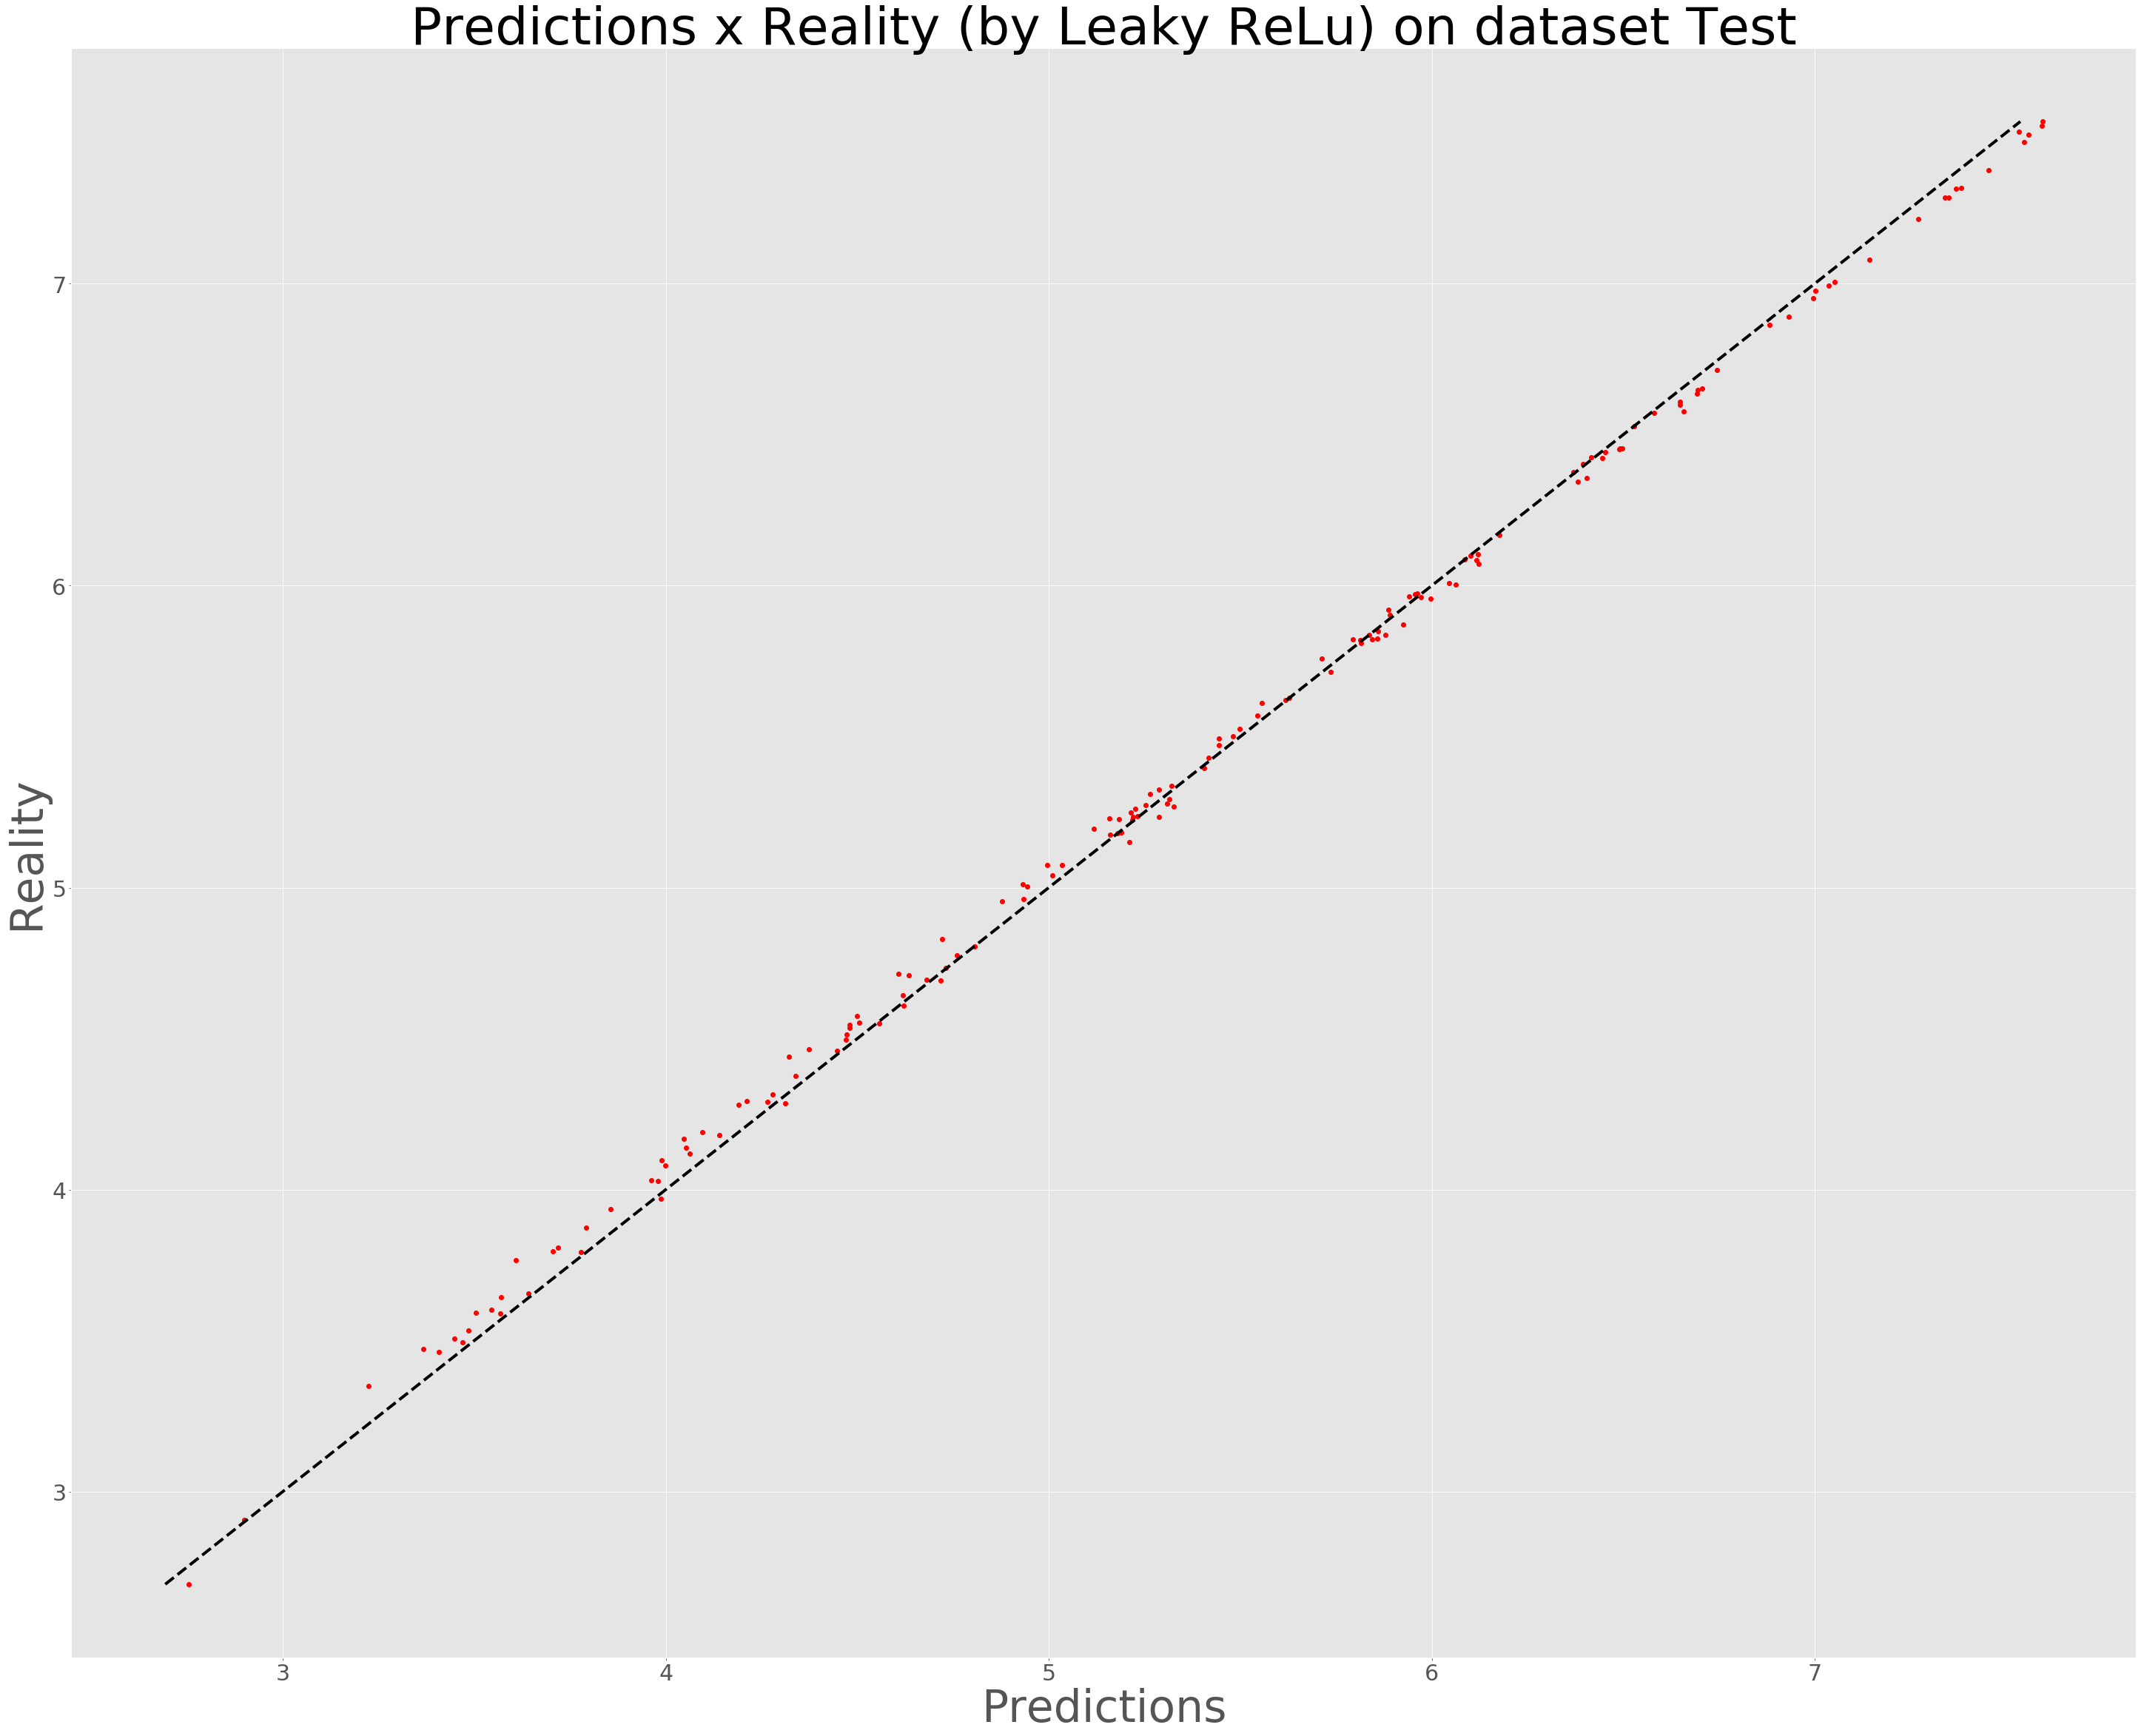

In [18]:
#Visualization

predictions = pd.DataFrame(np.array(raw_y_test_pred).reshape(-1,1),columns = ['Prediction'])
reality = pd.DataFrame(np.array(y_test_real).reshape(-1,1), columns = ['HappinessScore'])

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 60)
plt.ylabel('Reality', fontsize = 60)
plt.title('Predictions x Reality (by Leaky ReLu) on dataset Test', fontsize = 70)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show() #예상한 것을 matplotlib를 이용하여 그래프로 나타낸다. 

Model 3 : DNN Linear Combined Regressor - 세 번째 모델은 200, 100, 50, 25, 12단위에 대해 5개의 숨겨진 layer가 있으며 Relu함수를 이용합니다.

In [19]:
DLCR = tf.contrib.learn.DNNLinearCombinedRegressor(linear_feature_columns=feature_cols, 
                                                   dnn_feature_columns=feature_cols, dnn_hidden_units=[200, 100, 50, 25, 12])
DLCR.fit(input_fn=lambda: input_fn(training_set), steps=2000)
DLCR.evaluate(input_fn=lambda: input_fn(training_set), steps=2000)

{'loss': 4.1160728e-08, 'global_step': 2002}

In [20]:
# Evaluation on the test set created by train_test_split
ev = DLCR.evaluate(input_fn=lambda: input_fn(testing_set), steps=2000)

# Display the score on the testing set
# 0.002X in average
loss_score3 = ev["loss"]
print("Final Loss on the testing set with DLCR: {0:f}".format(loss_score3))# DLCR을 이용한 두번째 모델에서의 loss값 입니다. 

Final Loss on the testing set with DLCR: 0.000084


In [21]:
# predict testing set, calculate mse
preds = DLCR.predict(input_fn=lambda: input_fn(testing_set))

y_test_pred = []

for i, pr in enumerate(preds):                   # y_test_pred에 predict값을 list 형태로 넣어줍니다.
    y_test_pred.append(pr)
    
#print(y_test_pred)
a = raw_y_test_pred = MMS_y_test.inverse_transform(np.array(y_test_pred).reshape(-1,1))

b = y_test_real = raw_y_test.reshape(-1,1)

#print(np.concatenate((np.array(a).reshape(-1,1), b), axis=1))

mse3 = ((a-b)**2).mean(axis=0)
print("Final Mean Square Error on the testing set : ", mse3) #ReLu를 이용한 첫번째 모델에서 training set의 mean square error값 입니다. 

Final Mean Square Error on the testing set :  [0.00197615]


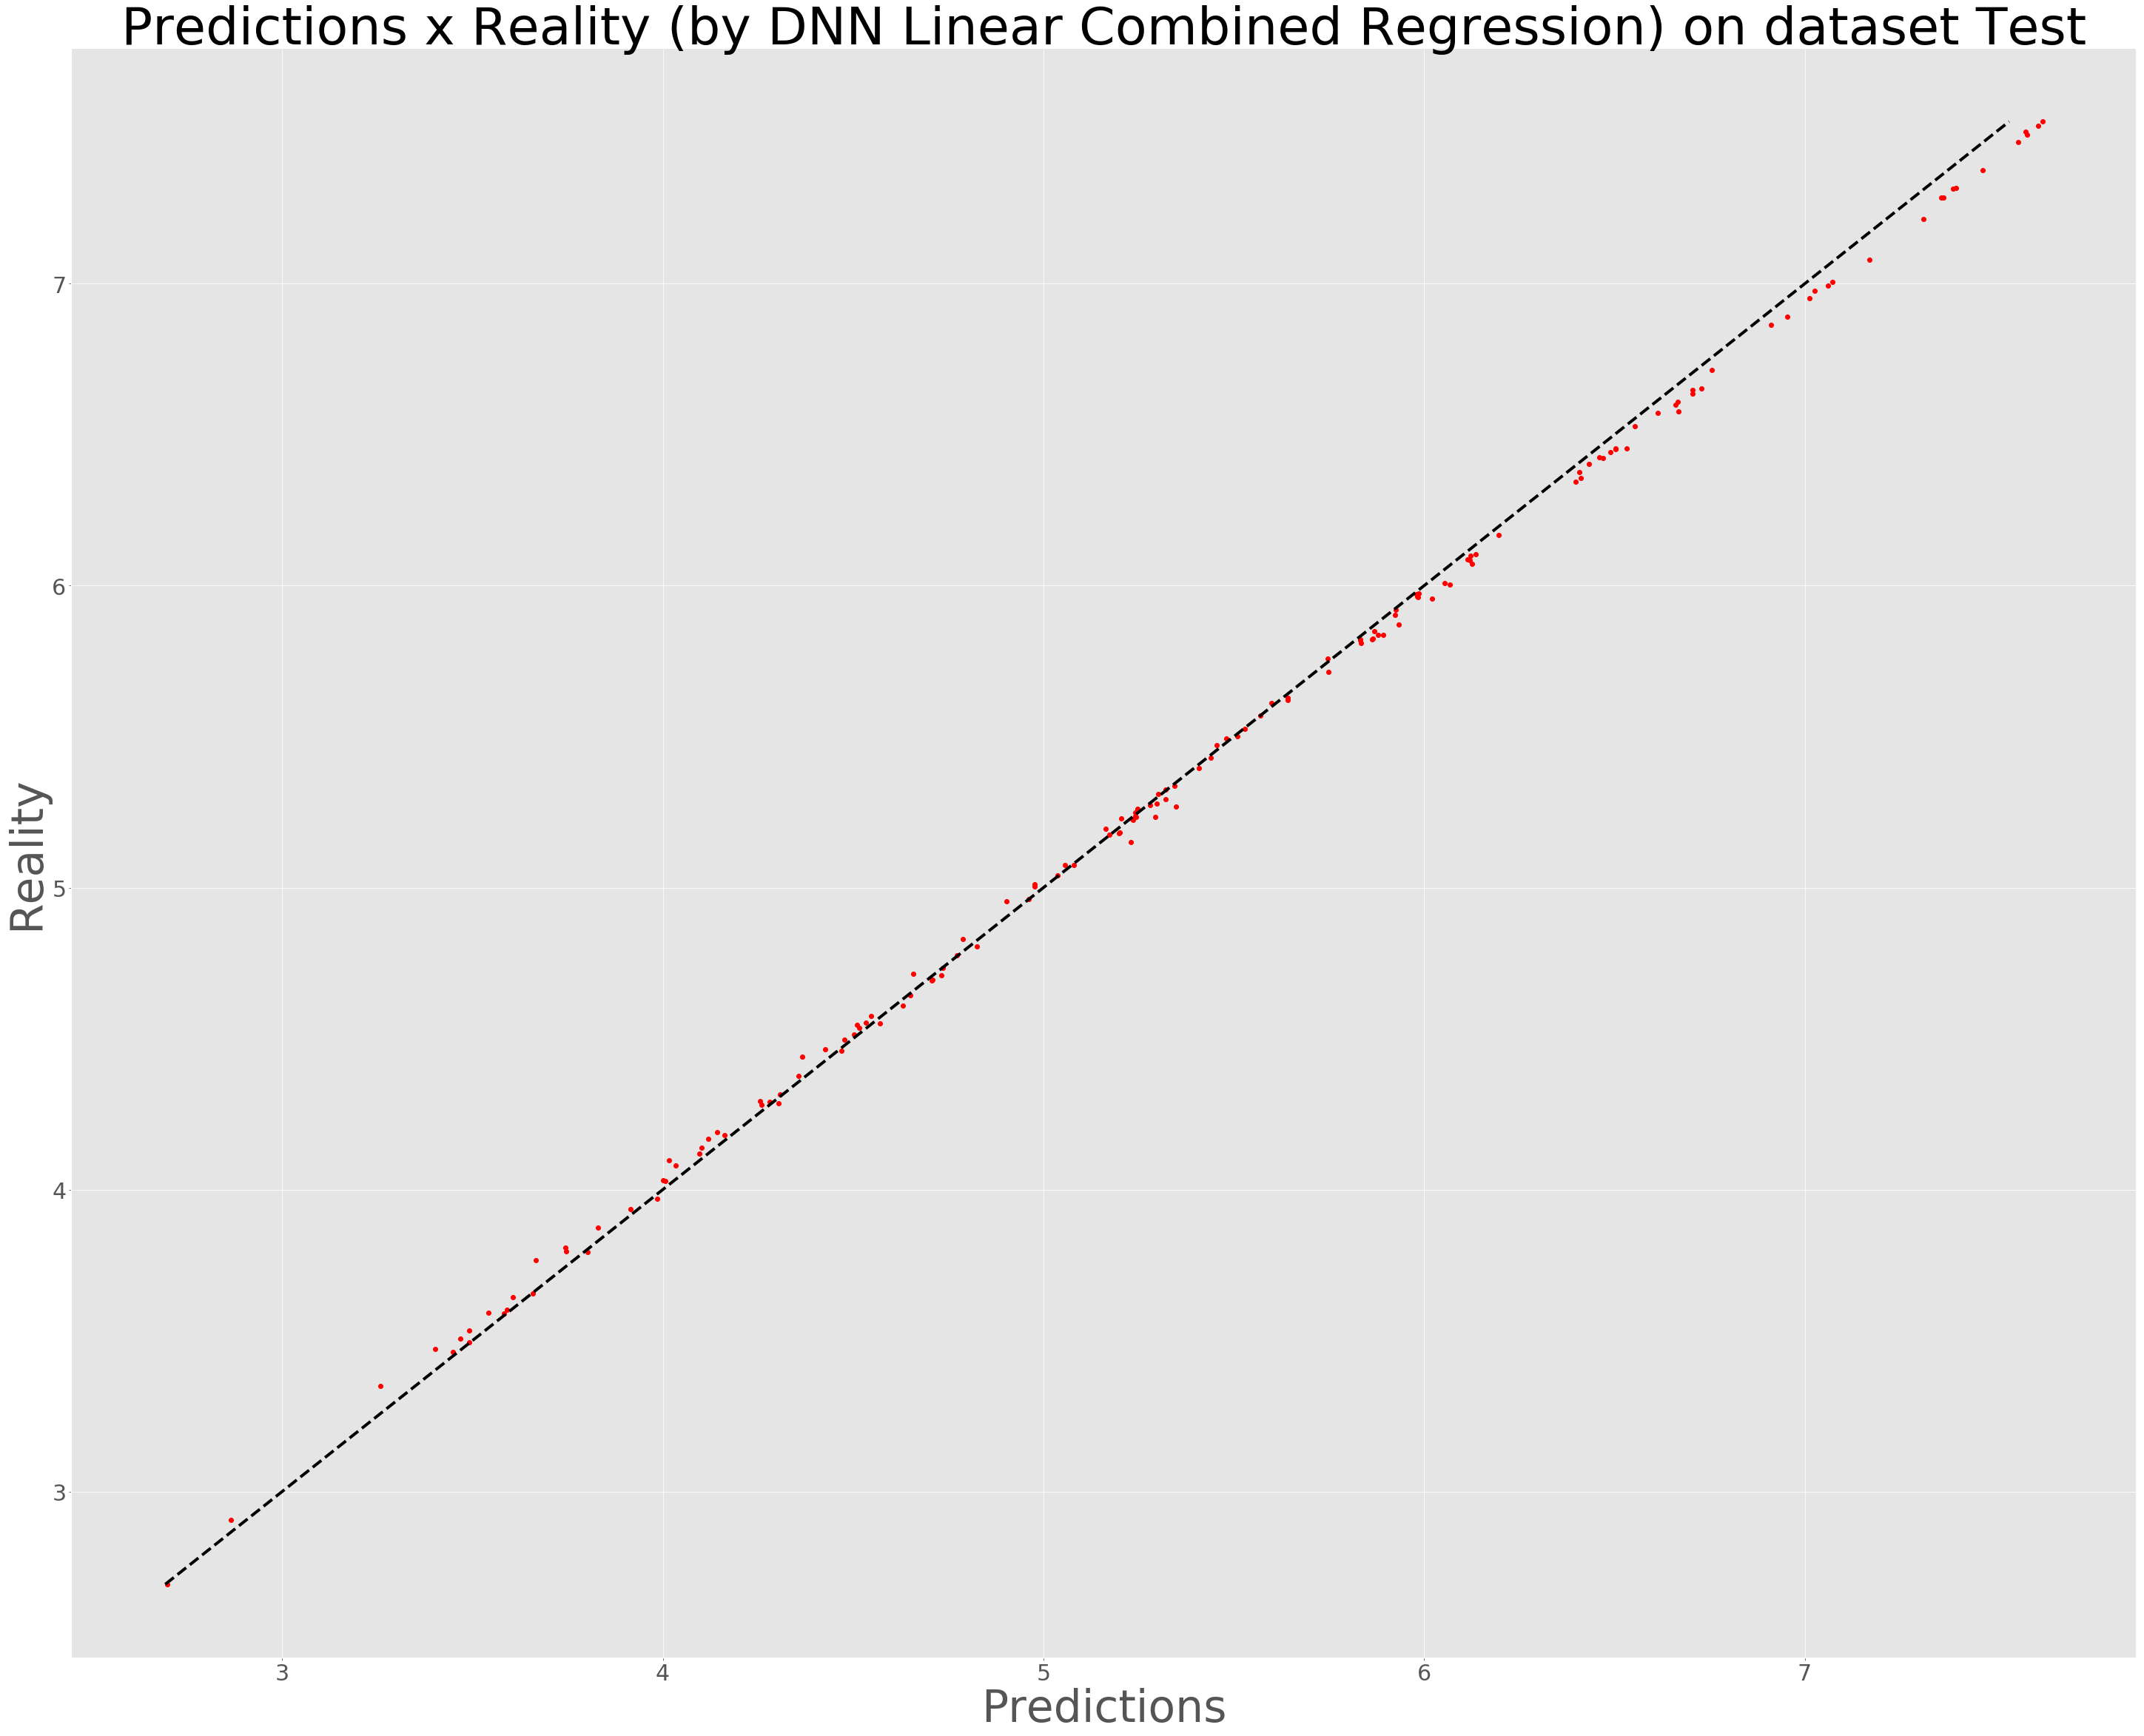

In [22]:
#Visualization

predictions = pd.DataFrame(np.array(raw_y_test_pred).reshape(-1,1),columns = ['Prediction'])
reality = pd.DataFrame(np.array(y_test_real).reshape(-1,1), columns = ['HappinessScore'])

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 60)
plt.ylabel('Reality', fontsize = 60)
plt.title('Predictions x Reality (by DNN Linear Combined Regression) on dataset Test', fontsize = 70)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show() #예상한 것을 matplotlib를 이용하여 그래프로 나타냅니다. 

Model 4 : Linear Regressor - 네 번째 모델은 선형 회귀 모델입니다.

In [23]:
#DNNLinearCombinedRegressor = tf.contrib.learn.DNNLinearCombinedRegressor(feature_columns=feature_cols,activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])

LR = tf.contrib.learn.LinearRegressor(feature_columns=feature_cols)
LR.fit(input_fn=lambda: input_fn(training_set), steps=2000)
LR.evaluate(input_fn=lambda: input_fn(training_set), steps=2000)

{'loss': 2.6155489e-09, 'global_step': 2000}

In [24]:
# Evaluation on the test set created by train_test_split
ev = LR.evaluate(input_fn=lambda: input_fn(testing_set), steps=2000)

# Display the score on the testing set
# 0.002X in average
loss_score4 = ev["loss"]
print("Final Loss on the testing set with LR: {0:f}".format(loss_score4))# LR을 이용한 두번째 모델에서의 loss값 입니다. 

Final Loss on the testing set with LR: 0.000078


In [25]:
# predict testing set, calculate mse
preds = LR.predict(input_fn=lambda: input_fn(testing_set))

y_test_pred = []

for i, pr in enumerate(preds):                   # y_test_pred에 predict값을 list 형태로 넣어줍니다.
    y_test_pred.append(pr)
    
#print(y_test_pred)
a = raw_y_test_pred = MMS_y_test.inverse_transform(np.array(y_test_pred).reshape(-1,1))

b = y_test_real = raw_y_test.reshape(-1,1)

#print(np.concatenate((np.array(a).reshape(-1,1), b), axis=1))

mse4 = ((a-b)**2).mean(axis=0)
print("Final Mean Square Error on the testing set : ", mse4) #ReLu를 이용한 첫번째 모델에서 training set의 mean square error값 입니다. 

Final Mean Square Error on the testing set :  [0.00182119]


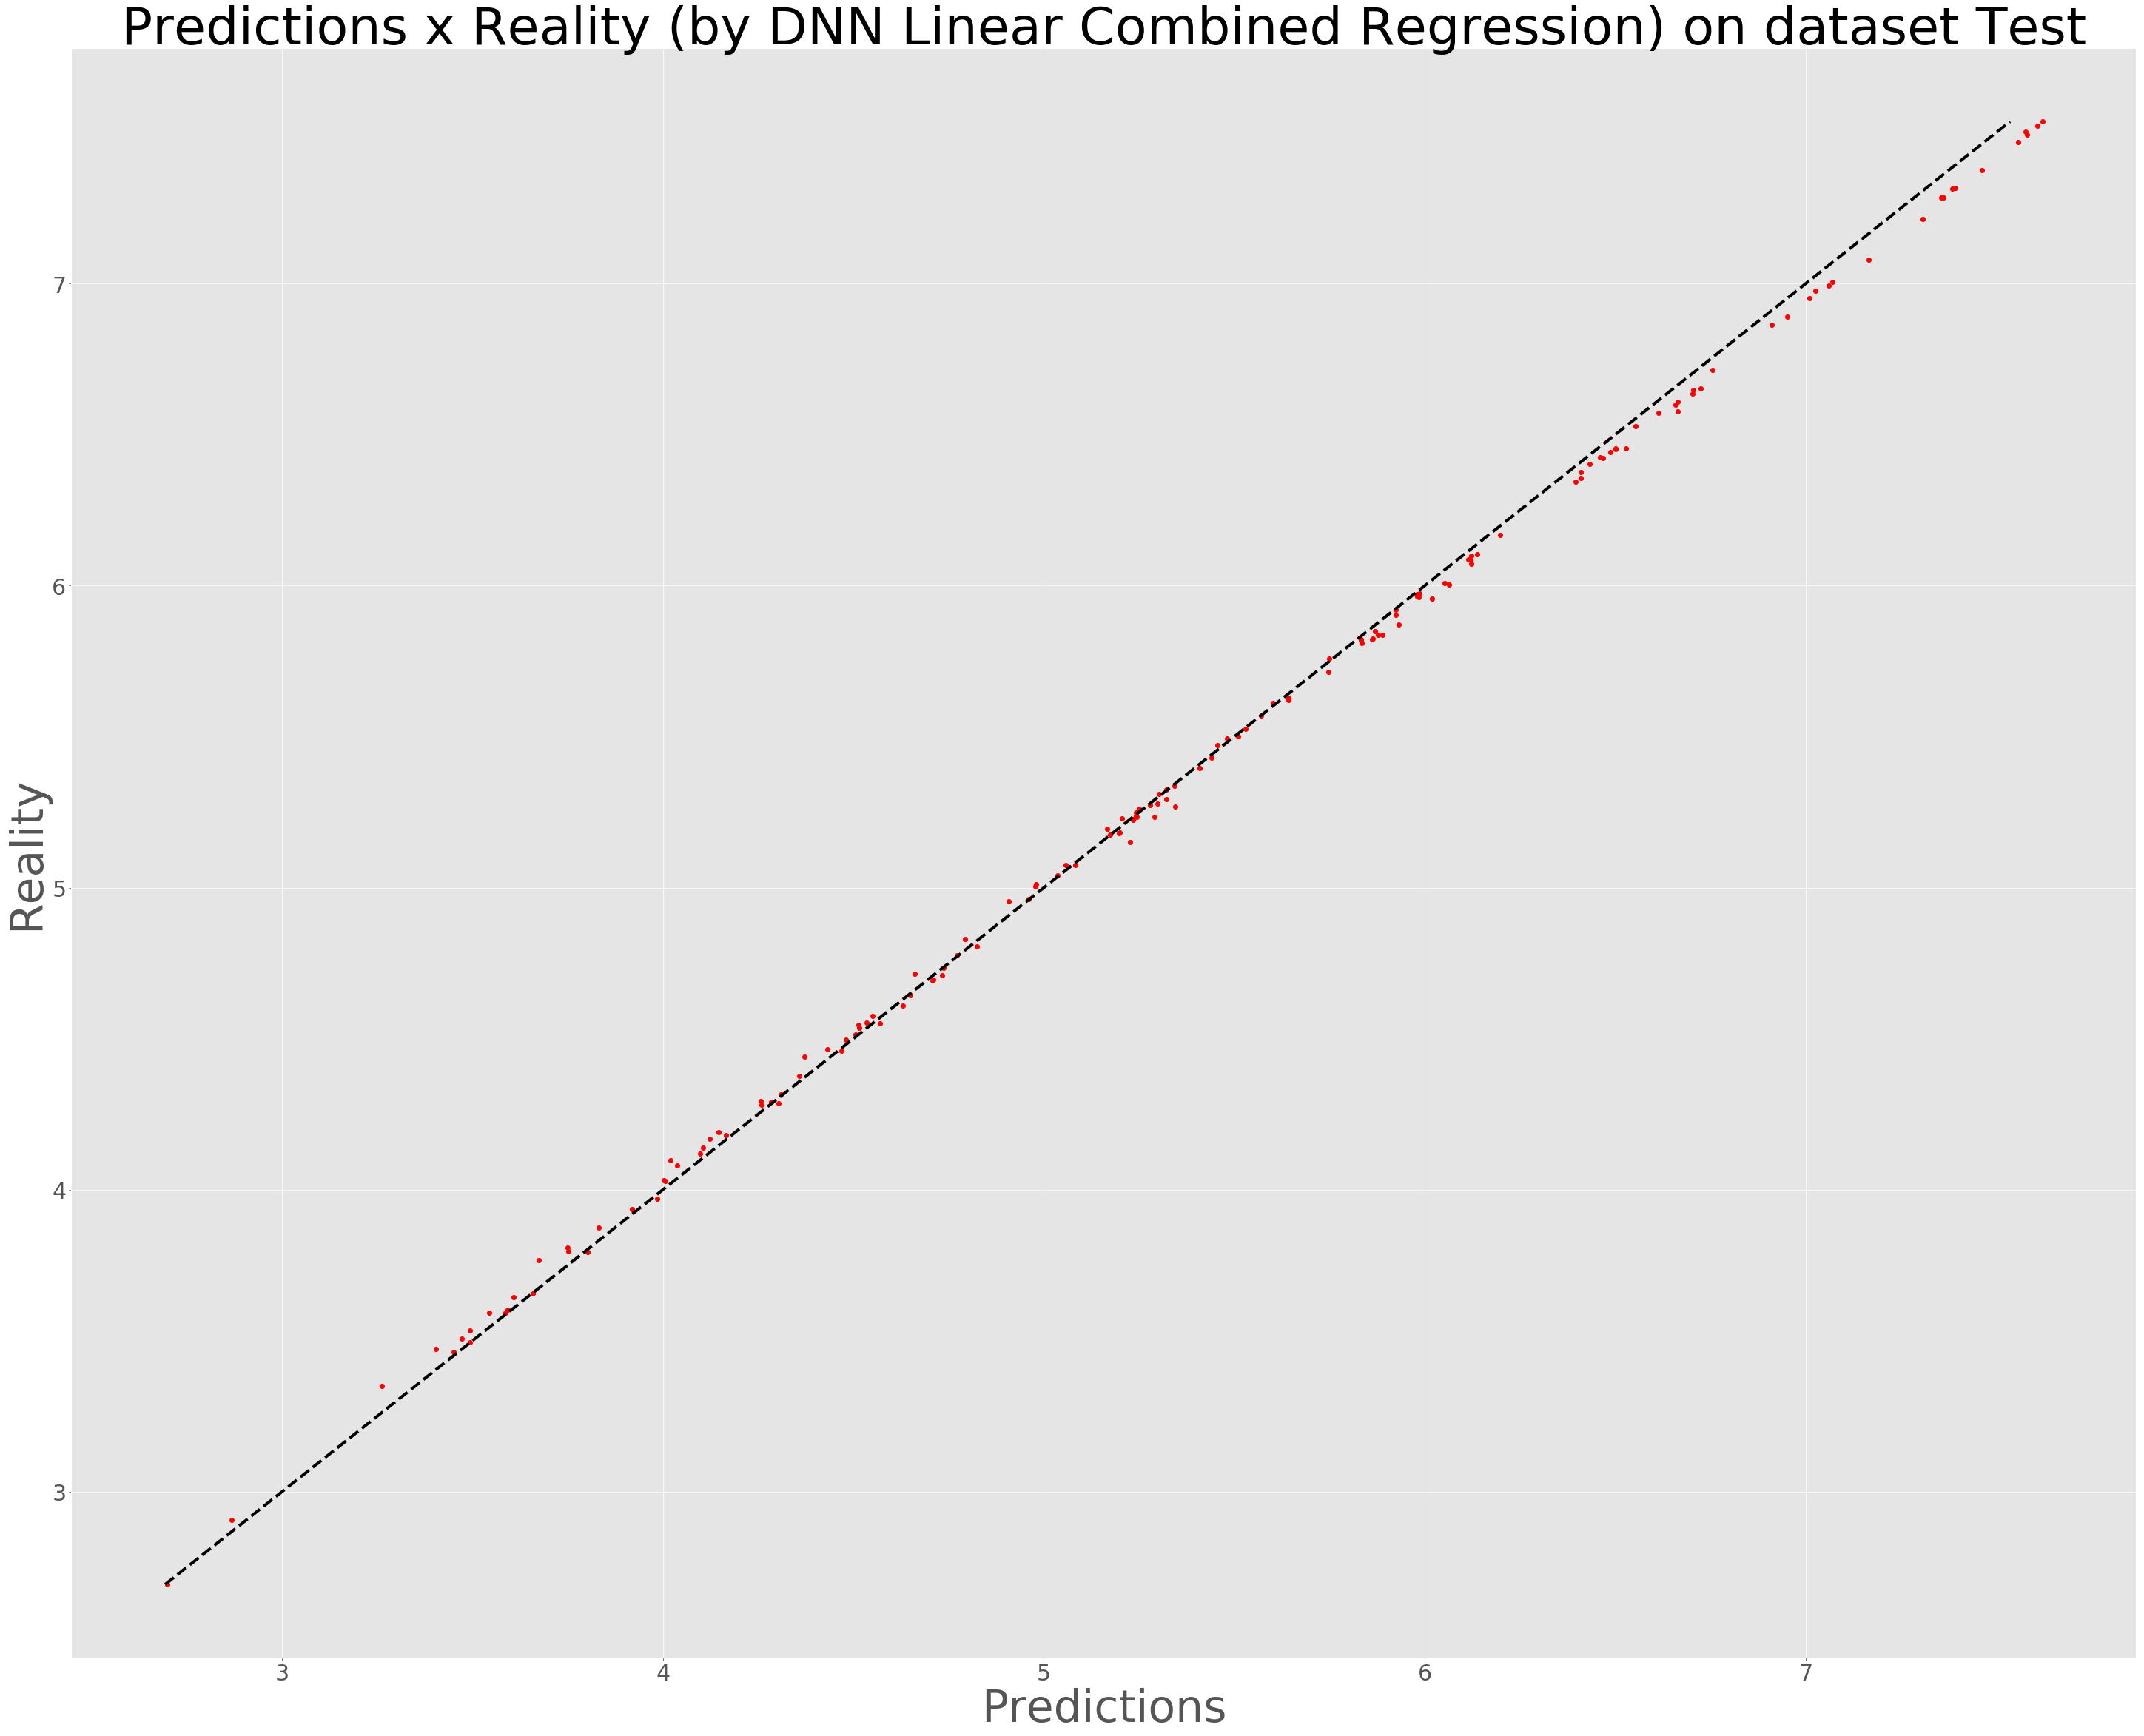

In [26]:
#Visualization

predictions = pd.DataFrame(np.array(raw_y_test_pred).reshape(-1,1),columns = ['Prediction'])
reality = pd.DataFrame(np.array(y_test_real).reshape(-1,1), columns = ['HappinessScore'])

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, reality.values, 'ro')
plt.xlabel('Predictions', fontsize = 60)
plt.ylabel('Reality', fontsize = 60)
plt.title('Predictions x Reality (by DNN Linear Combined Regression) on dataset Test', fontsize = 70)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show() #예상한 것을 matplotlib를 이용하여 그래프로 나타낸다. 

# 4. 최종 결과 정리 단계

In [27]:
list_score = [loss_score1, loss_score2, loss_score3, loss_score4]
list_model = ['Relu_cont', 'LRelu_cont', 'DLCR_cont', 'LR_cont']

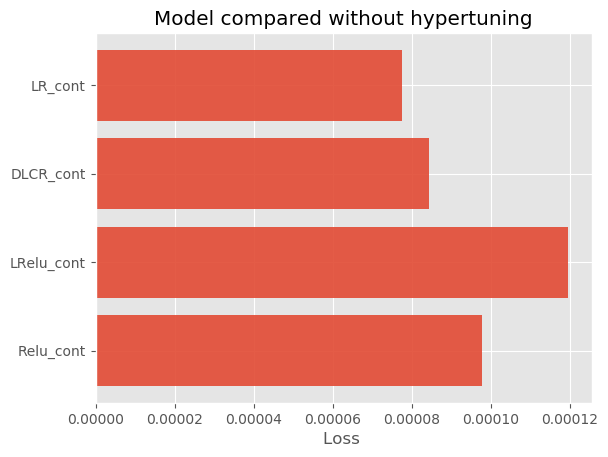

In [28]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()

In [29]:
list_mse = [np.asscalar(mse), np.asscalar(mse2), np.asscalar(mse3), np.asscalar(mse4)]
list_label = ['DNN_Relu_test', 'DNN_LeakyRelu_test', 'DLCR_Relu_test', 'LR_test']

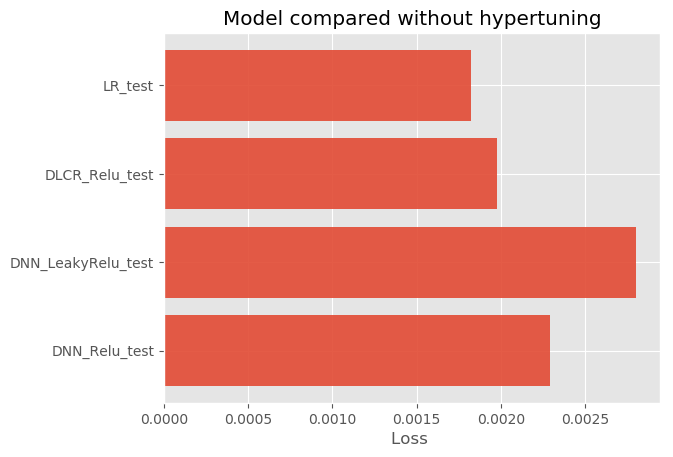

In [30]:
import matplotlib.pyplot as plt; plt.rcdefaults()

plt.style.use('ggplot')
objects = list_label
y_pos = np.arange(len(objects))
performance = list_mse
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Loss ')
plt.title('Model compared without hypertuning')
 
plt.show()